In [15]:
import joblib

import numpy as np
from numpy import logical_and as land
from numpy import logical_not as lnot
from skimage.feature import canny
from skimage.transform import rescale, ProjectiveTransform, warp
from skimage.morphology import dilation, disk
import cv2 as cv

import matplotlib.pyplot as plt
from skimage import io
from skimage.io import imread


SCALE = 0.33


def predict_image(image):
    img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    edges = canny(img,sigma=0.3,low_threshold=0.3*np.mean(img), high_threshold=1*np.mean(img))
    sal = disk(1)
    edges = dilation(edges, sal)
    
    edges = (edges).astype(np.uint8)
    ext_contours = cv.findContours(edges.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

    for n, contour in enumerate(ext_contours):
        contour = np.array(contour).squeeze() # we need to remove one dim, se below
    #if contour.ndim > 1:
     #   ax.plot(contour[:, 0], contour[:, 1], linewidth=2)
        
    contour = max(ext_contours, key= lambda x : cv.contourArea(x))

    # we need to remove one unnecessary dimension
    contour = contour.squeeze()
    image = np.zeros(img.shape)
    fill = cv.fillPoly(image, [contour], (255, 255, 255))

    plt.figure(dpi=150)
    plt.subplot(1,2,1)   
    # plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray)
    plt.subplot(1,2,2)     
    # plt.axis('off')
    plt.imshow(fill, cmap=plt.cm.gray)

    sudoku_digits = [
        np.int16([[-1, -1, -1, -1, -1, -1, -1, -1, -1],
                  [-1, -1, -1,  8,  9,  4, -1, -1, -1],
                  [-1, -1, -1,  6, -1,  1, -1, -1, -1],
                  [-1,  6,  5,  1, -1,  9,  7,  8, -1],
                  [-1,  1, -1, -1, -1, -1, -1,  3, -1],
                  [-1,  3,  9,  4, -1,  5,  6,  1, -1],
                  [-1, -1, -1,  8, -1,  2, -1, -1, -1],
                  [-1, -1, -1,  9,  1,  3, -1, -1, -1],
                  [-1, -1, -1, -1, -1, -1, -1, -1, -1]]),]
    mask = np.bool_(np.ones_like(image))

    # loading train image:
    train_img_4 = cv.imread('/autograder/source/train/train_4.jpg', 0)

    # loading model:  (you can use any other pickle-like format)
    #rf = joblib.load('/autograder/submission/random_forest.joblib')

    return mask, sudoku_digits



(array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]),
 [array([[-1, -1, -1, -1, -1, -1, -1, -1, -1],
         [-1, -1, -1,  8,  9,  4, -1, -1, -1],
         [-1, -1, -1,  6, -1,  1, -1, -1, -1],
         [-1,  6,  5,  1, -1,  9,  7,  8, -1],
         [-1,  1, -1, -1, -1, -1, -1,  3, -1],
         [-1,  3,  9,  4, -1,  5,  6,  1, -1],
         [-1, -1, -1,  8, -1,  2, -1, -1, -1],
         [-1, -1, -1,  9,  1,  3, -1, -1, -1],
         [-1, -1, -1, -1, -1, -1, -1, -1, -1]], dtype=int16)])

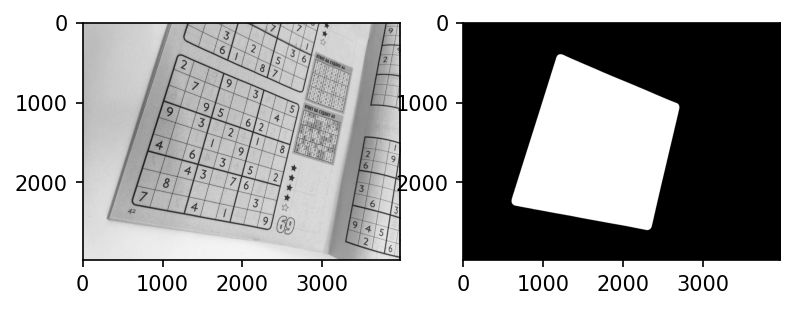

In [19]:
img = cv.imread("train_3.jpg")
predict_image(img)